In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
%matplotlib inline


**PROJECT: tmdb-moovies data**

QUESTIONS ABOUT TMDB-MOVIES DATA

*   Which month is considered to have a high revenue therefore a good time to release a movie?
*Is there a relationship between vote_average and runtime?





**Step 1: Data wrangling**

In [4]:
#loading data
from google.colab import files
uploaded = files.upload()
#gun_data=pd.read_xlsx(io.BytesIO(uploaded['gun_data.xlsx']))
#census=pd.read_csv(io.BytesIO(uploaded['U.S. Census Data.csv']))
movies=pd.read_csv(io.BytesIO(uploaded['tmdb-movies.csv']))
movies.head()

Saving tmdb-movies.csv to tmdb-movies.csv


id    imdb_id  popularity  ...  release_year    budget_adj   revenue_adj
0  135397  tt0369610   32.985763  ...          2015  1.379999e+08  1.392446e+09
1   76341  tt1392190   28.419936  ...          2015  1.379999e+08  3.481613e+08
2  262500  tt2908446   13.112507  ...          2015  1.012000e+08  2.716190e+08
3  140607  tt2488496   11.173104  ...          2015  1.839999e+08  1.902723e+09
4  168259  tt2820852    9.335014  ...          2015  1.747999e+08  1.385749e+09

[5 rows x 21 columns]

In [5]:
#checking the size of my data
movies.shape

(10866, 21)

In [6]:
#checking information of data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#checking the descriptive statistics
movies.describe()

id    popularity  ...    budget_adj   revenue_adj
count   10866.000000  10866.000000  ...  1.086600e+04  1.086600e+04
mean    66064.177434      0.646441  ...  1.755104e+07  5.136436e+07
std     92130.136561      1.000185  ...  3.430616e+07  1.446325e+08
min         5.000000      0.000065  ...  0.000000e+00  0.000000e+00
25%     10596.250000      0.207583  ...  0.000000e+00  0.000000e+00
50%     20669.000000      0.383856  ...  0.000000e+00  0.000000e+00
75%     75610.000000      0.713817  ...  2.085325e+07  3.369710e+07
max    417859.000000     32.985763  ...  4.250000e+08  2.827124e+09

[8 rows x 10 columns]

**Step 2:Data Cleaning**

In [8]:
#dropping some columns that is not needed for our questions
movies.drop(['homepage', 'tagline', 'keywords', 'overview','production_companies','budget','revenue','cast','director'], axis=1, inplace=True)
movies.head(1)

id    imdb_id  popularity  ... release_year    budget_adj   revenue_adj
0  135397  tt0369610   32.985763  ...         2015  1.379999e+08  1.392446e+09

[1 rows x 12 columns]

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


In [10]:
#checking the descriptive statistics again
movies.describe()

id    popularity  ...    budget_adj   revenue_adj
count   10866.000000  10866.000000  ...  1.086600e+04  1.086600e+04
mean    66064.177434      0.646441  ...  1.755104e+07  5.136436e+07
std     92130.136561      1.000185  ...  3.430616e+07  1.446325e+08
min         5.000000      0.000065  ...  0.000000e+00  0.000000e+00
25%     10596.250000      0.207583  ...  0.000000e+00  0.000000e+00
50%     20669.000000      0.383856  ...  0.000000e+00  0.000000e+00
75%     75610.000000      0.713817  ...  2.085325e+07  3.369710e+07
max    417859.000000     32.985763  ...  4.250000e+08  2.827124e+09

[8 rows x 8 columns]

In [11]:
#from the descriptive stats there are some zeros in runtime,budget_adj and revenue_adj so we fill out these zeros with the mean of each column.
#fill for runtime
movies['runtime'] = movies['runtime'].replace(0, movies['runtime'].mean())
#fill for budget_adj
movies['budget_adj'] = movies['budget_adj'].replace(0, movies['budget_adj'].mean())
#fill for revenue_adj
movies['revenue_adj'] = movies['revenue_adj'].replace(0, movies['revenue_adj'].mean())


In [12]:
#checking the descriptive statistics again to see if zeros are fixed
movies.describe()

id    popularity  ...    budget_adj   revenue_adj
count   10866.000000  10866.000000  ...  1.086600e+04  1.086600e+04
mean    66064.177434      0.646441  ...  2.675136e+07  7.980243e+07
std     92130.136561      1.000185  ...  3.050850e+07  1.365610e+08
min         5.000000      0.000065  ...  9.210911e-01  2.370705e+00
25%     10596.250000      0.207583  ...  1.755104e+07  5.136436e+07
50%     20669.000000      0.383856  ...  1.755104e+07  5.136436e+07
75%     75610.000000      0.713817  ...  2.085325e+07  5.136436e+07
max    417859.000000     32.985763  ...  4.250000e+08  2.827124e+09

[8 rows x 8 columns]

In [13]:
#checking for data types now. from previous information release_date is not in the right data type(datetime) so we change that.
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.dtypes


id                         int64
imdb_id                   object
popularity               float64
original_title            object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [14]:
#checking for duplicates and dropping them
sum(movies.duplicated())


1

In [15]:
#dropping one duplicate
movies.drop_duplicates(inplace=True)
sum(movies.duplicated())

0

In [16]:
#we check our data again to see how its looking
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10865 non-null  float64       
 3   original_title  10865 non-null  object        
 4   runtime         10865 non-null  float64       
 5   genres          10842 non-null  object        
 6   release_date    10865 non-null  datetime64[ns]
 7   vote_count      10865 non-null  int64         
 8   vote_average    10865 non-null  float64       
 9   release_year    10865 non-null  int64         
 10  budget_adj      10865 non-null  float64       
 11  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 1.1+ MB


In [17]:
#dropping null for genres column
movies = movies.dropna(subset=['genres'], axis=0)
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10842 non-null  int64         
 1   imdb_id         10834 non-null  object        
 2   popularity      10842 non-null  float64       
 3   original_title  10842 non-null  object        
 4   runtime         10842 non-null  float64       
 5   genres          10842 non-null  object        
 6   release_date    10842 non-null  datetime64[ns]
 7   vote_count      10842 non-null  int64         
 8   vote_average    10842 non-null  float64       
 9   release_year    10842 non-null  int64         
 10  budget_adj      10842 non-null  float64       
 11  revenue_adj     10842 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 1.1+ MB


**Step 3: Exploratory Data Analysis**

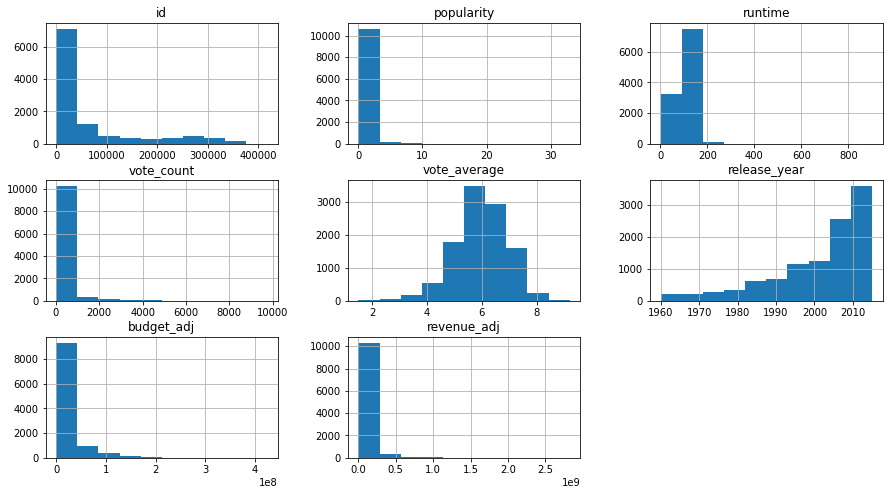

In [18]:
#histogram to see the skewness and shape of data
movies.hist(figsize=(15,8));

**Which month is considered to have a high revenue therefore a good time to release a movie?**

In [19]:
#creating a month column from the releasing date
movies['month'] = movies['release_date'].apply(lambda x: x.month)
movies.head()

id    imdb_id  popularity  ...    budget_adj   revenue_adj month
0  135397  tt0369610   32.985763  ...  1.379999e+08  1.392446e+09     6
1   76341  tt1392190   28.419936  ...  1.379999e+08  3.481613e+08     5
2  262500  tt2908446   13.112507  ...  1.012000e+08  2.716190e+08     3
3  140607  tt2488496   11.173104  ...  1.839999e+08  1.902723e+09    12
4  168259  tt2820852    9.335014  ...  1.747999e+08  1.385749e+09     4

[5 rows x 13 columns]

In [20]:
#we find the sum of revenue in each month by using group by
monthly_revenue = movies.groupby('month')['revenue_adj'].sum()
monthly_revenue

month
1     4.895277e+10
2     4.214897e+10
3     6.380589e+10
4     5.487055e+10
5     8.418096e+10
6     1.020808e+11
7     7.982522e+10
8     5.747161e+10
9     6.799156e+10
10    7.398933e+10
11    8.171477e+10
12    1.089184e+11
Name: revenue_adj, dtype: float64

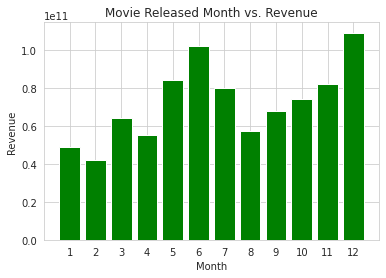

In [21]:
#we use bar chart to see the month with high revenue
sns.set_style('whitegrid')
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], monthly_revenue, tick_label = [1,2,3,4,5,6,7,8,9,10,11,12],color=['green'])
plt.title('Movie Released Month vs. Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month');


It can be seen from the bar chat that December have the highest revenue therefore we can say that December is a good time to release a movie.

**Is there a relationship between vote_average and runtime?**

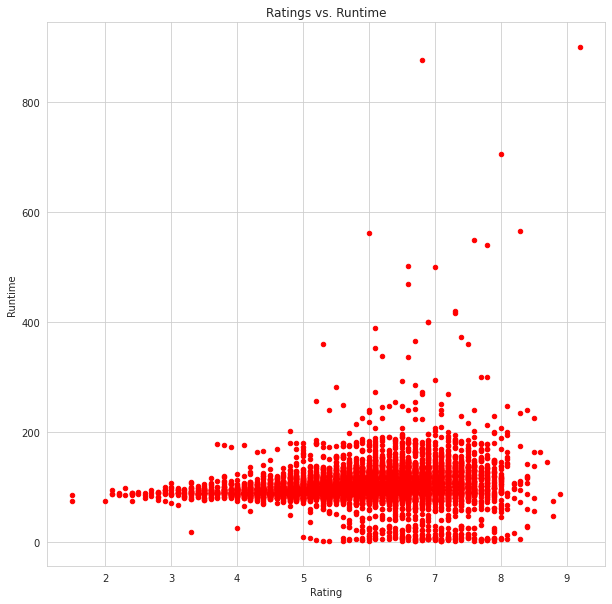

In [22]:
#to answer this question we have to use a scatter plot for these two columns
movies.plot(x='vote_average', y='runtime', kind='scatter', figsize=(10,10),color=['red'])
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Runtime');

In [23]:
#calculating correlation
movies['vote_average'].corr(movies['runtime'])

0.15577301240844077

From the scatter plot :

*   Movies with long runtimes tend to have higher ratings or vote average. 
*   Movies with runtimes between 50 and 200 tends to have a rating or vote average between 5 to 8.
* There is a  positive linear relation between runtime and vote_average because correlation is 0.2.



**Is there a relationship between budget_adj and revenue_adj?**

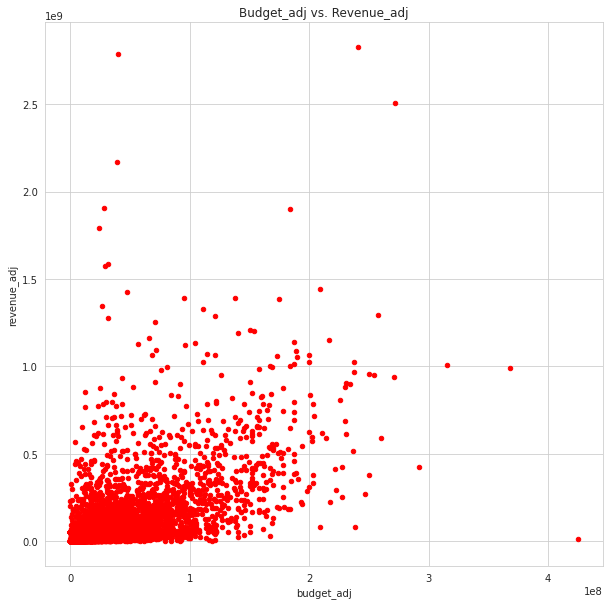

In [34]:
#to answer this question we have to use a scatter plot for these two columns
movies.plot(x='budget_adj', y='revenue_adj', kind='scatter', figsize=(10,10),color=['red'])
plt.title('Budget_adj vs. Revenue_adj')
plt.xlabel('budget_adj')
plt.ylabel('revenue_adj');

In [35]:
#calculating correlation
movies['budget_adj'].corr(movies['revenue_adj'])

0.602096214900685

From the scatter plot :

* There is a  positive linear relation between budget_adj and revenue_adj because correlation is 0.6.

**What genres movies are more popular?**

In [24]:
#separating genres that are together with this seperator '|'
def splitter(column,seperator):
    return column.str.split(seperator,expand=True)

In [26]:
# creating a copy of genre
genre_copy= movies.copy()

#split them and convert to array
genre_copy['genres'] = genre_copy.genres.str.split('|')

#use explode to give each genre a row
each_row = genre_copy.explode('genres')
each_row.head()

id    imdb_id  popularity  ...    budget_adj   revenue_adj month
0  135397  tt0369610   32.985763  ...  1.379999e+08  1.392446e+09     6
0  135397  tt0369610   32.985763  ...  1.379999e+08  1.392446e+09     6
0  135397  tt0369610   32.985763  ...  1.379999e+08  1.392446e+09     6
0  135397  tt0369610   32.985763  ...  1.379999e+08  1.392446e+09     6
1   76341  tt1392190   28.419936  ...  1.379999e+08  3.481613e+08     5

[5 rows x 13 columns]

In [27]:

gen = each_row[['popularity', 'genres','release_year']]
gen.head()

popularity           genres  release_year
0   32.985763           Action          2015
0   32.985763        Adventure          2015
0   32.985763  Science Fiction          2015
0   32.985763         Thriller          2015
1   28.419936           Action          2015

In [28]:
#grouping  by genre,realease year and get popularity
gen_grouped = each_row.groupby(['release_year','genres']).popularity.mean()
gen_yearwise = gen_grouped.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [29]:
#reseting index
gen_yearwise.reset_index(level=2,inplace=True)

In [30]:
gen_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [31]:
#checking how many each genre we have in the 56 etries
genre = gen_yearwise.genres.value_counts()
genre

Adventure          14
Animation          10
Fantasy             8
Crime               5
Family              3
War                 3
Action              3
Western             2
Science Fiction     2
Music               2
Mystery             2
Thriller            1
History             1
Name: genres, dtype: int64

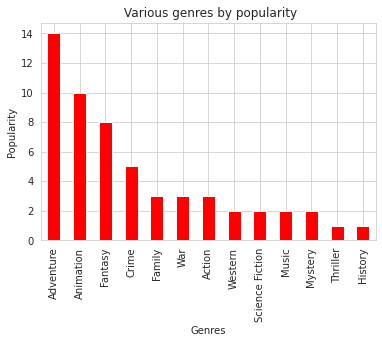

In [33]:
genre.plot.bar(title=" Various genres by popularity",xlabel="Genres",ylabel="Popularity",color='red');

From the bar chart above  Adventure kind of movies are more popular followed by Animation and Fantasy.

**Conclusion**

After answering my questions, I realised the month with the highest revenue is December. This means production companies should release movies in that month in order to get high revenues. I also saw that longer movies tend to have high ratings than shorter movies but movies that have a runtime between 50 and 200 minutes had a vote average above the mean(5.974922). This shows a good rating for these types of movies. Also Adbenture movies were more popular and there is a relation between revenue_adj and budget_adj. This means to have a high revenue you need to spend more on the movie.

Some limitations of this work is that, cleaning the data for budget_adj and runtime and revenue_adj, I replaced all 0 entries with mean of the columns which I think can be more accurate if I used a different method like regression. I also think the data presented is not enough for me to make concrete analysis about. The data was 10866 and it could have been more. Also I think there were so many unnecessary columns for my questions. 




**Resources used**

*   https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python
*   https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=color

